## Initialization using Xavier initialization

In [1]:
import torch
import torch.nn as nn


torch.manual_seed(1)
w = torch.empty(2, 3)
nn.init.xavier_normal_(w)
print(w)


tensor([[ 0.4183,  0.1688,  0.0390],
        [ 0.3930, -0.2858, -0.1051]])


In [2]:
class MyModule(nn.Module):
    def __init(self):
        super().__init__()
        self.w1 = tensor.empty(2,3, requires_grad = True)
        nn.init.xavier_normal_(self.w1)
        self.w2 = tensor.empty(1,2, requires_grad = True)
        nn.init.xavier_normal_(self.w2)

“Computing the value z is a forward pass in an NN. We used the backward method on the loss tensor to compute  and . Since this is a very simple example, we can obtain  symbolically to verify that the computed gradients match the results we obtained in the previous code example:”


In [3]:
w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.5, requires_grad=True) 

x = torch.tensor([1.4])
y = torch.tensor([2.1])


z = torch.add(torch.mul(w, x), b)
 
loss = (y-z).pow(2).sum()
loss.backward()

print('dL/dw : ', w.grad)
print('dL/db : ', b.grad)

dL/dw :  tensor(-0.5600)
dL/db :  tensor(-0.4000)


In [4]:
model = nn.Sequential(
    nn.Linear(4,16),
    nn.ReLU(),
    nn.Linear(16,3),
    nn.ReLU()
)

In [5]:
model

Sequential(
  (0): Linear(in_features=4, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=3, bias=True)
  (3): ReLU()
)

In [6]:
nn.init.xavier_uniform_(model[0].weight)

Parameter containing:
tensor([[ 0.2004,  0.1695, -0.1240,  0.2105],
        [ 0.1770,  0.3344,  0.3689, -0.1855],
        [ 0.5351, -0.0633, -0.0188, -0.5170],
        [-0.3525, -0.3200, -0.2343,  0.3894],
        [-0.1790, -0.4093,  0.2107,  0.1754],
        [ 0.3548, -0.2834,  0.1188, -0.1994],
        [-0.1231, -0.4365, -0.2496, -0.1677],
        [ 0.2342,  0.1001,  0.1353,  0.5467],
        [ 0.5338,  0.3736,  0.0174, -0.3789],
        [ 0.4281, -0.1370, -0.0443, -0.4719],
        [-0.1082, -0.3533,  0.5033, -0.4735],
        [-0.4269, -0.0186, -0.2962,  0.1960],
        [-0.2108, -0.2573,  0.0310,  0.3965],
        [-0.3853,  0.2572,  0.3519,  0.5358],
        [-0.3834,  0.1327, -0.4050,  0.4676],
        [-0.2125,  0.3299,  0.0163, -0.0427]], requires_grad=True)

## Solving the XOR problem

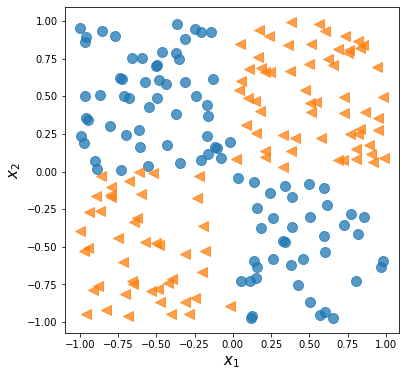

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


np.random.seed(1)
torch.manual_seed(1)
x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1]<0] = 0

n_train = 100
x_train = torch.tensor(x[:n_train, :], dtype=torch.float32)
y_train = torch.tensor(y[:n_train], dtype=torch.float32)
x_valid = torch.tensor(x[n_train:, :], dtype=torch.float32)
y_valid = torch.tensor(y[n_train:], dtype=torch.float32)

fig = plt.figure(figsize=(6, 6))
plt.plot(x[y==0, 0], 
         x[y==0, 1], 'o', alpha=0.75, markersize=10)
plt.plot(x[y==1, 0], 
         x[y==1, 1], '<', alpha=0.75, markersize=10)
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)

#plt.savefig('figures/13_02.png', dpi=300)
plt.show()

In [8]:
model = nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()
)

In [9]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)


In [10]:
from torch.utils.data import TensorDataset, DataLoader

train_ds = TensorDataset(x_train,y_train)
train_dl = DataLoader(train_ds, batch_size = 2, shuffle = True)

In [11]:
torch.manual_seed(1)

In [12]:
model[0].weight.shape

torch.Size([1, 2])

In [13]:
z = model(torch.rand(5,2))

In [14]:
z

tensor([[0.5129],
        [0.4453],
        [0.4071],
        [0.4433],
        [0.4834]], grad_fn=<SigmoidBackward0>)

In [15]:
batch_size = 2

In [16]:
z[:,0]

tensor([0.5129, 0.4453, 0.4071, 0.4433, 0.4834], grad_fn=<SelectBackward0>)

In [17]:
torch.manual_seed(1)
num_epochs = 200
def train(model, num_epochs, train_dl, x_valid, y_valid):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    for epoch in range(num_epochs):
        for x_batch, y_batch in train_dl:
            pred = model.predict(x_batch)
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()
            is_correct = ((pred>=0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.mean()

        loss_hist_train[epoch] /= n_train/batch_size
        accuracy_hist_train[epoch] /= n_train/batch_size

        pred = model(x_valid)[:, 0]
        loss = loss_fn(pred, y_valid)
        loss_hist_valid[epoch] = loss.item()
        is_correct = ((pred>=0.5).float() == y_valid).float()
        accuracy_hist_valid[epoch] += is_correct.mean()
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

history = train(model, num_epochs, train_dl, x_valid, y_valid)

AttributeError: 'Sequential' object has no attribute 'predict'

In [ ]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

#plt.savefig('figures/13_03.png', dpi=300)

In [ ]:
model = nn.Sequential(
    nn.Linear(2,4),
    nn.ReLU(),
    nn.Linear(4,4),
    nn.ReLU(),
    nn.Linear(4,1),
    nn.Sigmoid()
)
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)

model

In [ ]:
model

In [ ]:
history = train(model, 200, train_dl, x_valid, y_valid)

In [ ]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

#plt.savefig('figures/13_03.png', dpi=300)

In [18]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        l1 = nn.Linear(2,4)
        a1 = nn.ReLU()
        l2 = nn.Linear(4,4)
        a2 = nn.ReLU()
        l3 = nn.Linear(4,1)
        a3 = nn.Sigmoid()
        l = [l1,a1,l2,a2,l3,a3]
        self.module_list = nn.ModuleList(l)
        
    def forward(self,x):
        for f in self.module_list:
            x = f(x)
        return x

    def predict(self,x):
        x = torch.tensor(x, dtype = torch.float32)
        # Since the output of forward will be a two dimensional array, we use index to get only the output
        pred = self.forward(x)[:,0]
        return (pred >= 0.5).float()
        
model = MyModule()
    
    

In [ ]:
torch.manual_seed(1)
num_epochs = 200
def train(model, num_epochs, train_dl, x_valid, y_valid):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    for epoch in range(num_epochs):
        for x_batch, y_batch in train_dl:
            pred = model.predict(x_batch)
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()
            is_correct = ((pred>=0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.mean()

        loss_hist_train[epoch] /= n_train/batch_size
        accuracy_hist_train[epoch] /= n_train/batch_size

        pred = model(x_valid)[:, 0]
        loss = loss_fn(pred, y_valid)
        loss_hist_valid[epoch] = loss.item()
        is_correct = ((pred>=0.5).float() == y_valid).float()
        accuracy_hist_valid[epoch] += is_correct.mean()
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

history = train(model, num_epochs, train_dl, x_valid, y_valid)

In [ ]:
for x,y in train_dl:
    i,j = x,y

In [19]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.015)

In [ ]:
num_epochs = 200

In [ ]:
x = model.forward(x)

In [ ]:
print(model.predict(i))

In [ ]:
history = train(model, num_epochs, train_dl, x_valid, y_valid)

In [21]:
torch.normal(0.0, 0.1, (2,2))

tensor([[ 0.0062,  0.0621],
        [-0.0452, -0.0166]])

## Writing custom layers in PyTorch

In [39]:
class NoisyLinear(nn.Module):
    def __init__(self, input_size, output_size, noise_stddev=0.1):
        super().__init__()
        w = torch.Tensor(input_size, output_size)
        self.w = nn.Parameter(w)  # nn.Parameter is a Tensor that's a module parameter.
        nn.init.xavier_uniform_(self.w)
        b = torch.Tensor(output_size).fill_(0)
        self.b = nn.Parameter(b)
        self.noise_stddev = noise_stddev

    def forward(self, x, training=False):
        if training:
            noise = torch.normal(0.0, self.noise_stddev, x.shape)
            x_new = torch.add(x, noise)
        else:
            x_new = x
        return torch.add(torch.mm(x_new, self.w), self.b)   

In [36]:
class NoisyLinear(nn.Module):
    def __init__(self, input_size, output_size , noise_stddev = 0.1):
        super().__init__()
        w = torch.Tensor(input_size,output_size)
        self.w = nn.Parameter(w)
        nn.init.xavier_uniform_(self.w)
        b = torch.tensor(output_size).fill_(0)
        self.b = nn.Parameter(b)
        self.noise_stddev = noise_stddev
        
    def forward(self, x, training=False):
        if training:
            noise = torch.normal(0.0, self.noise_stddev, x.shape)
            x_new = torch.add(x,noise)
        else:
            x_new = x 
        return torch.add(torch.mm(self.x,self.w), self.b)
        

In [37]:
torch.manual_seed(1)

In [40]:
noisy_layer = NoisyLinear(4,2)

In [41]:
x = torch.zeros(1,4)

In [42]:
print(noisy_layer(x, training=True))

tensor([[-0.0621,  0.0451]], grad_fn=<AddBackward0>)
